## AQI of United States from year 2000 to 2021

What is Air Quality Index(AQI)?

An air quality index (AQI) is used by government agencies[1] to communicate to the public how polluted the air currently is or how polluted it is forecast to become. Public health risks increase as the AQI rises. Different countries have their own air quality indices, corresponding to different national air quality standards.



## Objective

- Find the state wise AQI of each year from year 2000 to 2021.
- Find the overall yearwise AQI.
- Find the top 10 days which has best and worst AQI from year 2000 to 2021.

Air Quality Index (AQI) 
	
- 0   to 50	    Good	
- 51  to 100	Moderate	
- 101 to 150	Unhealthy for Sensitive Groups	
- 151 to 200	Unhealthy	
- 201 to 300	Very Unhealthy	
- 301 to 500	Hazardous	

## Importing Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Reading Data

In [65]:
data = pd.read_csv('pollution_2000_2021.csv')

In [66]:
data.head(2)

Date  Year  Month  Day                                  Address  \
0  2000-01-01  2000      1    1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
1  2000-01-02  2000      1    2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   

     State    County     City   O3 Mean  O3 1st Max Value  ...  \
0  Arizona  Maricopa  Phoenix  0.019765             0.040  ...   
1  Arizona  Maricopa  Phoenix  0.015882             0.032  ...   

   CO 1st Max Hour  CO AQI  SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour  \
0               23    25.0  3.000000                9.0                21   
1                0    26.0  1.958333                3.0                22   

   SO2 AQI   NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour  NO2 AQI  
0     13.0  19.041667               49.0                19       46  
1      4.0  22.958333               36.0                19       34  

[2 rows x 24 columns]

In [67]:
data.shape  # for finding no: of rows and column

(608699, 24)

In [68]:
data.columns # for viewing all the column headings

Index(['Date', 'Year', 'Month', 'Day', 'Address', 'State', 'County', 'City',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI'],
      dtype='object')

In [69]:
data.info() # for finding information like datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               608699 non-null  object 
 1   Year               608699 non-null  int64  
 2   Month              608699 non-null  int64  
 3   Day                608699 non-null  int64  
 4   Address            608699 non-null  object 
 5   State              608699 non-null  object 
 6   County             608699 non-null  object 
 7   City               608699 non-null  object 
 8   O3 Mean            608699 non-null  float64
 9   O3 1st Max Value   608699 non-null  float64
 10  O3 1st Max Hour    608699 non-null  int64  
 11  O3 AQI             608699 non-null  int64  
 12  CO Mean            608699 non-null  float64
 13  CO 1st Max Value   608699 non-null  float64
 14  CO 1st Max Hour    608699 non-null  int64  
 15  CO AQI             608699 non-null  float64
 16  SO

## Dropping all unnecessary columns

In [70]:
data = data.drop(['Date','Address','County','O3 Mean','O3 1st Max Value',
'O3 1st Max Hour','CO Mean','CO 1st Max Value','CO 1st Max Hour',
'SO2 Mean','SO2 1st Max Value','SO2 1st Max Hour',
'NO2 Mean','NO2 1st Max Value','NO2 1st Max Hour'],axis= 1)

In [71]:
data.head() # for viewing top 5 rows

Year  Month  Day    State     City  O3 AQI  CO AQI  SO2 AQI  NO2 AQI
0  2000      1    1  Arizona  Phoenix      37    25.0     13.0       46
1  2000      1    2  Arizona  Phoenix      30    26.0      4.0       34
2  2000      1    3  Arizona  Phoenix      15    28.0     16.0       48
3  2000      1    4  Arizona  Phoenix      31    34.0     23.0       72
4  2000      1    5  Arizona  Phoenix      11    42.0     21.0       58

## Checking for duplicates rows

In [72]:
data.duplicated().sum() # it shows total number of duplicate rows

16185

In [73]:
data = data.drop_duplicates() # dropping duplicate rows

In [74]:
data.shape 

(592514, 9)

In [75]:
data 

Year  Month  Day    State           City  O3 AQI  CO AQI  SO2 AQI  \
0       2000      1    1  Arizona        Phoenix      37    25.0     13.0   
1       2000      1    2  Arizona        Phoenix      30    26.0      4.0   
2       2000      1    3  Arizona        Phoenix      15    28.0     16.0   
3       2000      1    4  Arizona        Phoenix      31    34.0     23.0   
4       2000      1    5  Arizona        Phoenix      11    42.0     21.0   
...      ...    ...  ...      ...            ...     ...     ...      ...   
608694  2021      6   26  Wyoming  Not in a city      45     1.0      0.0   
608695  2021      6   27  Wyoming  Not in a city      39     1.0      0.0   
608696  2021      6   28  Wyoming  Not in a city      46     1.0      0.0   
608697  2021      6   29  Wyoming  Not in a city      61     1.0      0.0   
608698  2021      6   30  Wyoming  Not in a city      50     1.0      0.0   

        NO2 AQI  
0            46  
1            34  
2            48  
3            72  
4            58  
...         ...  
608694        2  
608695        2  
608696        5  
608697        7  
608698        7  

[592514 rows x 9 columns]

## Resetting Index

In [76]:
data = data.reset_index(drop=True)

data

Year  Month  Day    State           City  O3 AQI  CO AQI  SO2 AQI  \
0       2000      1    1  Arizona        Phoenix      37    25.0     13.0   
1       2000      1    2  Arizona        Phoenix      30    26.0      4.0   
2       2000      1    3  Arizona        Phoenix      15    28.0     16.0   
3       2000      1    4  Arizona        Phoenix      31    34.0     23.0   
4       2000      1    5  Arizona        Phoenix      11    42.0     21.0   
...      ...    ...  ...      ...            ...     ...     ...      ...   
592509  2021      6   26  Wyoming  Not in a city      45     1.0      0.0   
592510  2021      6   27  Wyoming  Not in a city      39     1.0      0.0   
592511  2021      6   28  Wyoming  Not in a city      46     1.0      0.0   
592512  2021      6   29  Wyoming  Not in a city      61     1.0      0.0   
592513  2021      6   30  Wyoming  Not in a city      50     1.0      0.0   

        NO2 AQI  
0            46  
1            34  
2            48  
3            72  
4            58  
...         ...  
592509        2  
592510        2  
592511        5  
592512        7  
592513        7  

[592514 rows x 9 columns]

In [77]:
data.head(10)  # for viewing top 10 rows

Year  Month  Day    State     City  O3 AQI  CO AQI  SO2 AQI  NO2 AQI
0  2000      1    1  Arizona  Phoenix      37    25.0     13.0       46
1  2000      1    2  Arizona  Phoenix      30    26.0      4.0       34
2  2000      1    3  Arizona  Phoenix      15    28.0     16.0       48
3  2000      1    4  Arizona  Phoenix      31    34.0     23.0       72
4  2000      1    5  Arizona  Phoenix      11    42.0     21.0       58
5  2000      1    6  Arizona  Phoenix      23    41.0     24.0       71
6  2000      1    7  Arizona  Phoenix      22    40.0     30.0       41
7  2000      1    8  Arizona  Phoenix      19    57.0     26.0       39
8  2000      1    9  Arizona  Phoenix      20    32.0     19.0       35
9  2000      1   10  Arizona  Phoenix      14    42.0     30.0       68

## Finding max value of four columns

In [78]:
data['AQI'] = data[['O3 AQI','CO AQI','SO2 AQI', 'NO2 AQI']].max(axis=1) # max value of four columns is added into a new column 'AQI'

In [79]:
data.head()

Year  Month  Day    State     City  O3 AQI  CO AQI  SO2 AQI  NO2 AQI   AQI
0  2000      1    1  Arizona  Phoenix      37    25.0     13.0       46  46.0
1  2000      1    2  Arizona  Phoenix      30    26.0      4.0       34  34.0
2  2000      1    3  Arizona  Phoenix      15    28.0     16.0       48  48.0
3  2000      1    4  Arizona  Phoenix      31    34.0     23.0       72  72.0
4  2000      1    5  Arizona  Phoenix      11    42.0     21.0       58  58.0

In [80]:
data1 = data.drop(['O3 AQI','CO AQI','SO2 AQI', 'NO2 AQI'],axis=1) # dropping unnecessary columns

data1

Year  Month  Day    State           City   AQI
0       2000      1    1  Arizona        Phoenix  46.0
1       2000      1    2  Arizona        Phoenix  34.0
2       2000      1    3  Arizona        Phoenix  48.0
3       2000      1    4  Arizona        Phoenix  72.0
4       2000      1    5  Arizona        Phoenix  58.0
...      ...    ...  ...      ...            ...   ...
592509  2021      6   26  Wyoming  Not in a city  45.0
592510  2021      6   27  Wyoming  Not in a city  39.0
592511  2021      6   28  Wyoming  Not in a city  46.0
592512  2021      6   29  Wyoming  Not in a city  61.0
592513  2021      6   30  Wyoming  Not in a city  50.0

[592514 rows x 6 columns]

In [81]:
state_data = data1.drop(["City","Month","Day"],axis=1)  # again dropping some columns for further simplification of analysis

state_data

Year    State   AQI
0       2000  Arizona  46.0
1       2000  Arizona  34.0
2       2000  Arizona  48.0
3       2000  Arizona  72.0
4       2000  Arizona  58.0
...      ...      ...   ...
592509  2021  Wyoming  45.0
592510  2021  Wyoming  39.0
592511  2021  Wyoming  46.0
592512  2021  Wyoming  61.0
592513  2021  Wyoming  50.0

[592514 rows x 3 columns]

## Splitting Data Year Wise

For finding AQI values of different states in US in each year from 2000 to 2021

## YEAR 2000

In [82]:
year_2000 = state_data.loc[state_data['Year'] == 2000] 

year_2000

Year      State    AQI
0      2000    Arizona   46.0
1      2000    Arizona   34.0
2      2000    Arizona   48.0
3      2000    Arizona   72.0
4      2000    Arizona   58.0
...     ...        ...    ...
23154  2000  Wisconsin   53.0
23155  2000  Wisconsin  105.0
23156  2000  Wisconsin  103.0
23157  2000  Wisconsin   50.0
23158  2000  Wisconsin   23.0

[23159 rows x 3 columns]

In [83]:
year_2000_mean = year_2000.groupby(['State'],as_index=False).mean()

year_2000_mean

State    Year        AQI
0                Arizona  2000.0  58.502273
1             California  2000.0  45.099988
2               Colorado  2000.0  44.308540
3   District Of Columbia  2000.0  46.319559
4                Florida  2000.0  46.730337
5               Illinois  2000.0  48.547653
6                Indiana  2000.0  52.556886
7                 Kansas  2000.0  49.035278
8               Kentucky  2000.0  53.451613
9              Louisiana  2000.0  52.341530
10              Michigan  2000.0  54.300000
11              Missouri  2000.0  52.739938
12            New Jersey  2000.0  46.397759
13              New York  2000.0  46.447872
14        North Carolina  2000.0  72.461765
15              Oklahoma  2000.0  59.660377
16          Pennsylvania  2000.0  51.840409
17                 Texas  2000.0  52.096806
18              Virginia  2000.0  46.933281
19            Washington  2000.0  33.283186
20             Wisconsin  2000.0  46.871508

In [84]:
year_2000_mean['AQI'] = year_2000_mean['AQI'].astype(int)

year_2000_mean

State    Year  AQI
0                Arizona  2000.0   58
1             California  2000.0   45
2               Colorado  2000.0   44
3   District Of Columbia  2000.0   46
4                Florida  2000.0   46
5               Illinois  2000.0   48
6                Indiana  2000.0   52
7                 Kansas  2000.0   49
8               Kentucky  2000.0   53
9              Louisiana  2000.0   52
10              Michigan  2000.0   54
11              Missouri  2000.0   52
12            New Jersey  2000.0   46
13              New York  2000.0   46
14        North Carolina  2000.0   72
15              Oklahoma  2000.0   59
16          Pennsylvania  2000.0   51
17                 Texas  2000.0   52
18              Virginia  2000.0   46
19            Washington  2000.0   33
20             Wisconsin  2000.0   46

In [85]:
year_2000_mean = year_2000_mean.drop(['Year'],axis=1)

year_2000_mean


State  AQI
0                Arizona   58
1             California   45
2               Colorado   44
3   District Of Columbia   46
4                Florida   46
5               Illinois   48
6                Indiana   52
7                 Kansas   49
8               Kentucky   53
9              Louisiana   52
10              Michigan   54
11              Missouri   52
12            New Jersey   46
13              New York   46
14        North Carolina   72
15              Oklahoma   59
16          Pennsylvania   51
17                 Texas   52
18              Virginia   46
19            Washington   33
20             Wisconsin   46

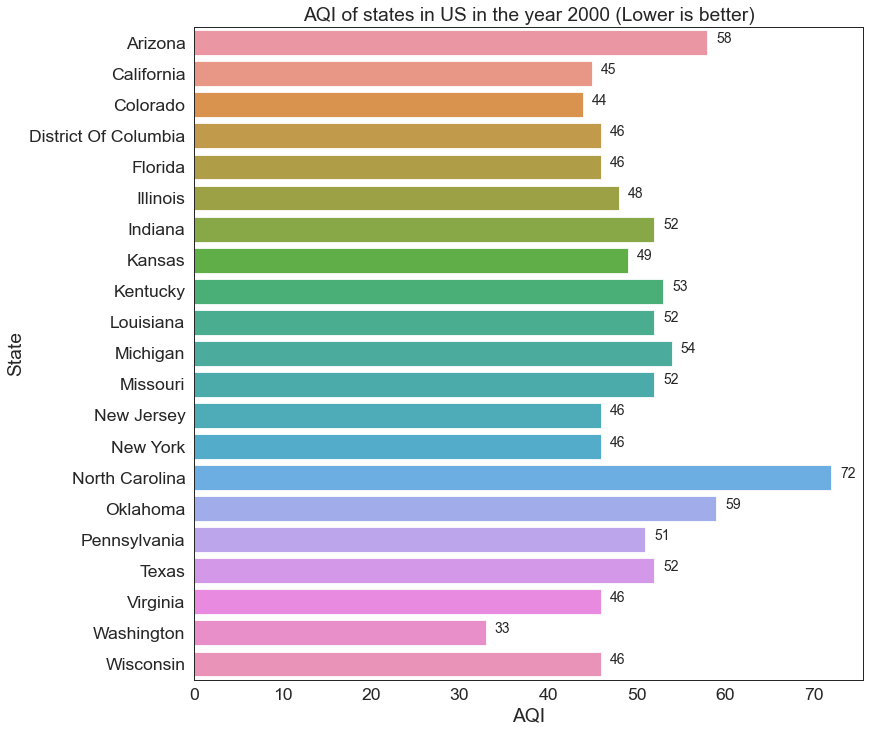

In [122]:
fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2000_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2000 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2000_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=14))
plt.show()
fig.savefig('2000.png',bbox_inches = 'tight', dpi = 200)


## Repeating Procedure

Same steps used in year 2000 is repeated by changing only year values in the following cells to get value of each year

## YEAR 2001

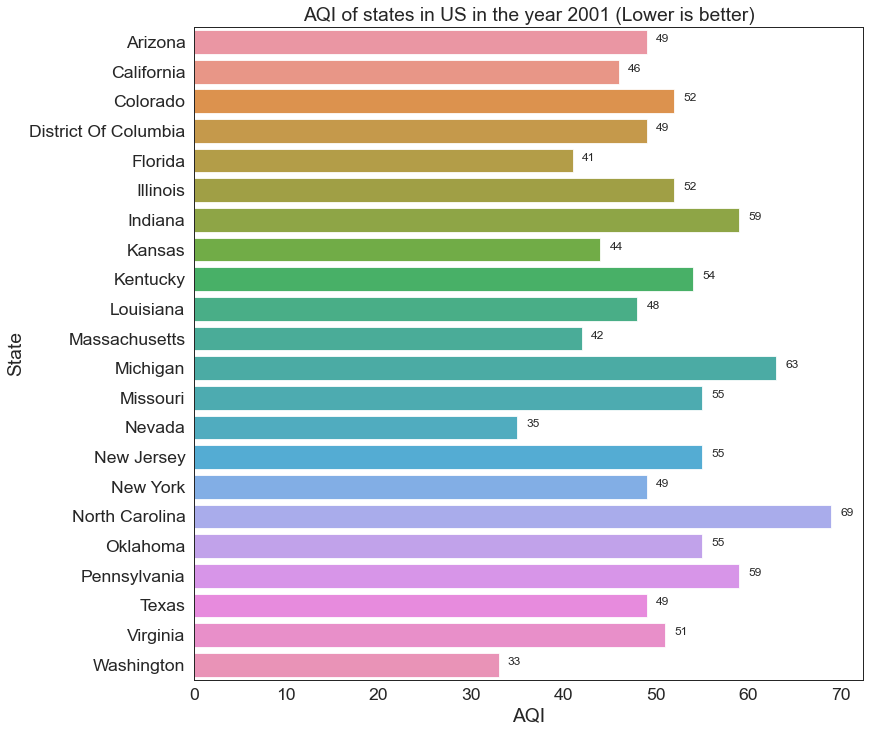

In [87]:
year_2001 = state_data.loc[state_data['Year'] == 2001]
year_2001_mean = year_2001.groupby(['State'],as_index=False).mean()
year_2001_mean['AQI'] = year_2001_mean['AQI'].astype(int)
year_2001_mean = year_2001_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2001_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2001 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2001_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2001.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2002

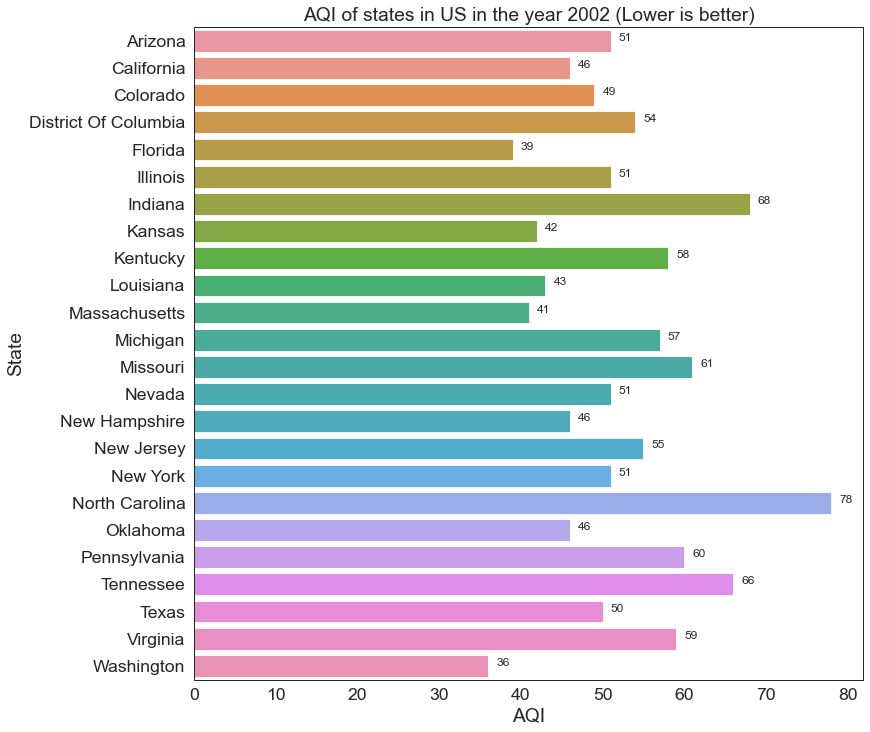

In [88]:
year_2002 = state_data.loc[state_data['Year'] == 2002]
year_2002_mean = year_2002.groupby(['State'],as_index=False).mean()
year_2002_mean['AQI'] = year_2002_mean['AQI'].astype(int)
year_2002_mean = year_2002_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2002_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2002 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2002_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2002.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2003

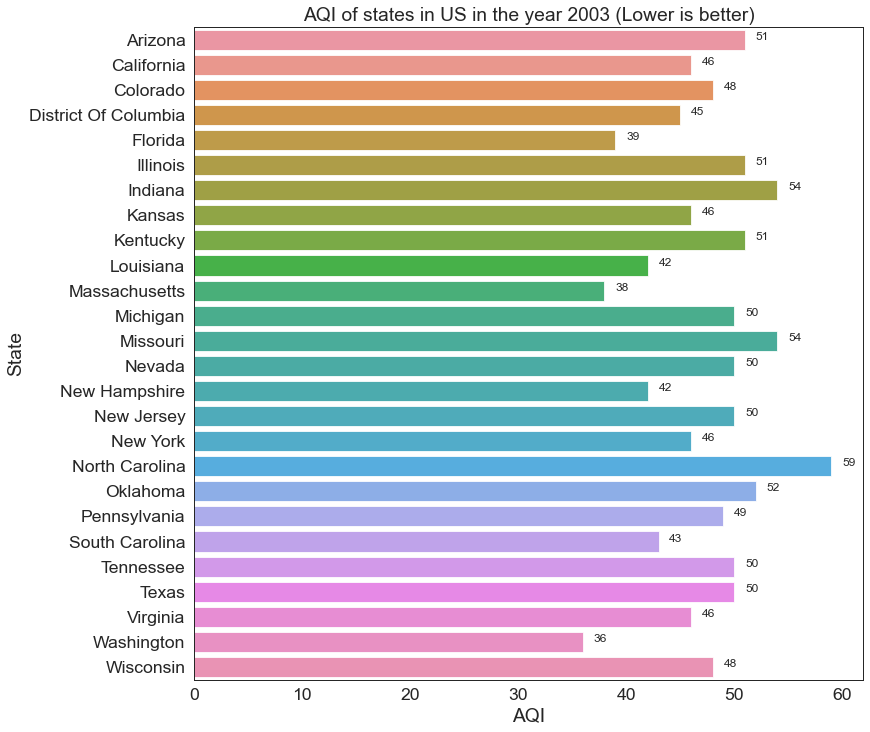

In [89]:
year_2003 = state_data.loc[state_data['Year'] == 2003]
year_2003_mean = year_2003.groupby(['State'],as_index=False).mean()
year_2003_mean['AQI'] = year_2003_mean['AQI'].astype(int)
year_2003_mean = year_2003_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2003_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2003 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2003_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2003.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2004

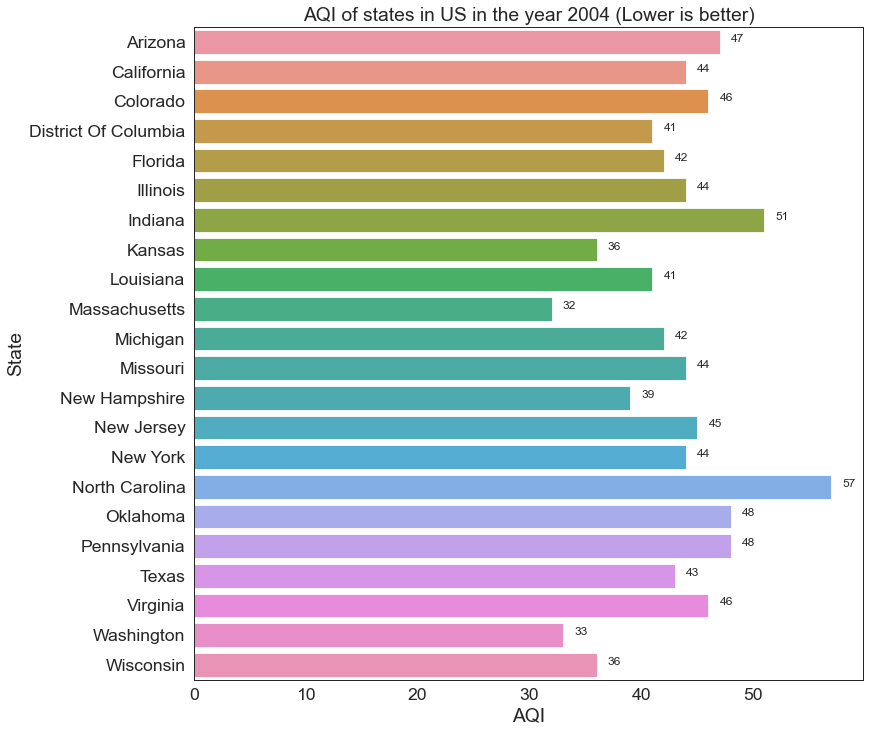

In [90]:
year_2004 = state_data.loc[state_data['Year'] == 2004]
year_2004_mean = year_2004.groupby(['State'],as_index=False).mean()
year_2004_mean['AQI'] = year_2004_mean['AQI'].astype(int)
year_2004_mean = year_2004_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2004_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2004 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2004_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2004.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2005

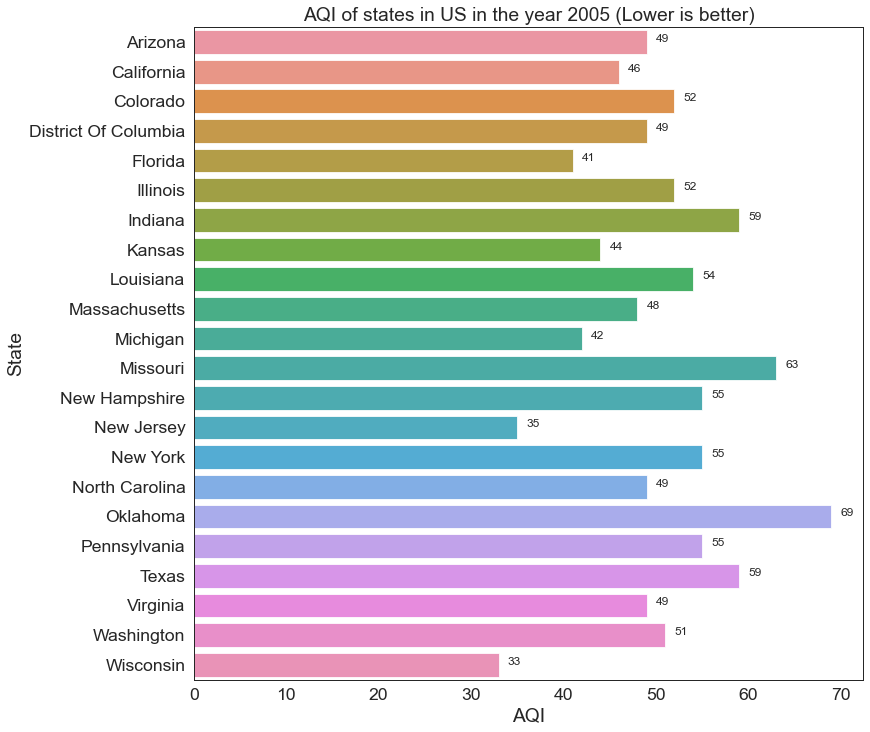

In [91]:
year_2005 = state_data.loc[state_data['Year'] == 2005]
year_2005_mean = year_2005.groupby(['State'],as_index=False).mean()
year_2005_mean['AQI'] = year_2001_mean['AQI'].astype(int)
year_2005_mean = year_2005_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2005_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2005 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2005_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2005.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2006

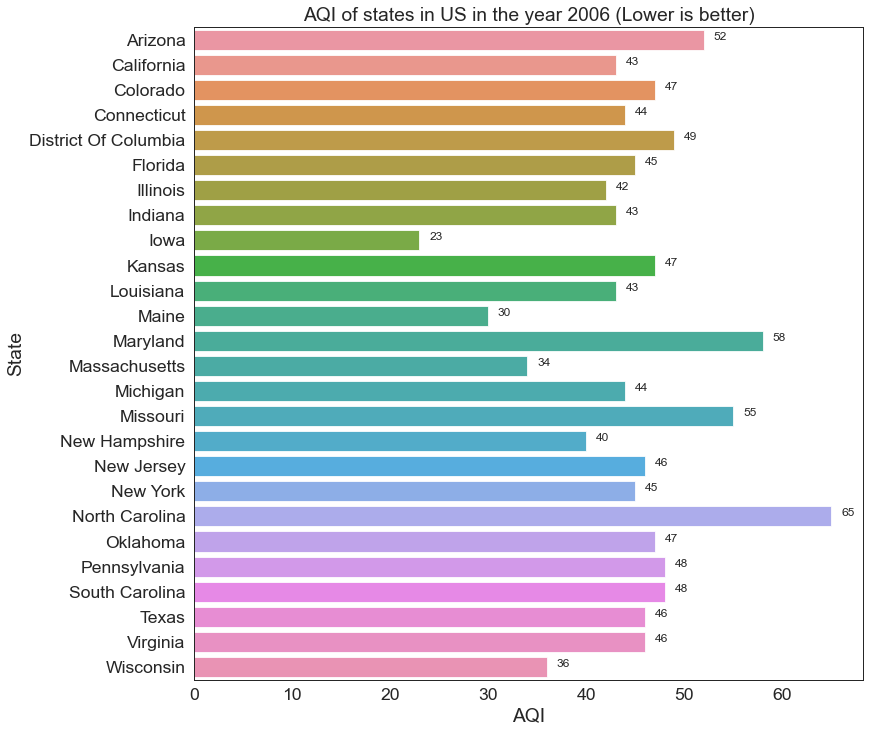

In [92]:
year_2006 = state_data.loc[state_data['Year'] == 2006]
year_2006_mean = year_2006.groupby(['State'],as_index=False).mean()
year_2006_mean['AQI'] = year_2006_mean['AQI'].astype(int)
year_2006_mean = year_2006_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2006_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2006 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2006_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2006.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2007

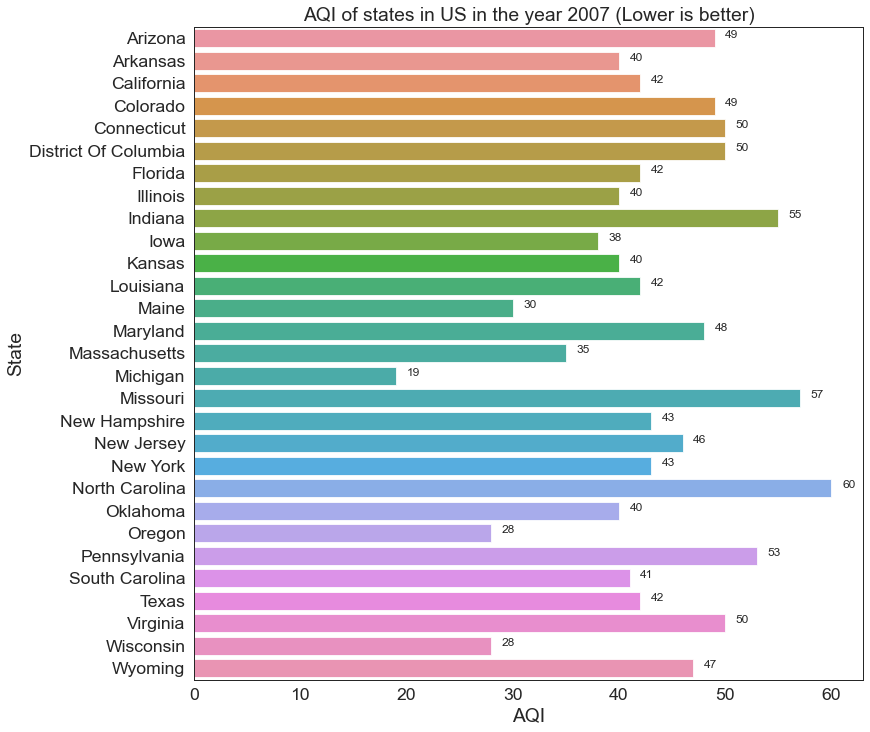

In [93]:
year_2007 = state_data.loc[state_data['Year'] == 2007]
year_2007_mean = year_2007.groupby(['State'],as_index=False).mean()
year_2007_mean['AQI'] = year_2007_mean['AQI'].astype(int)
year_2007_mean = year_2007_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2007_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2007 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2007_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2007.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2008

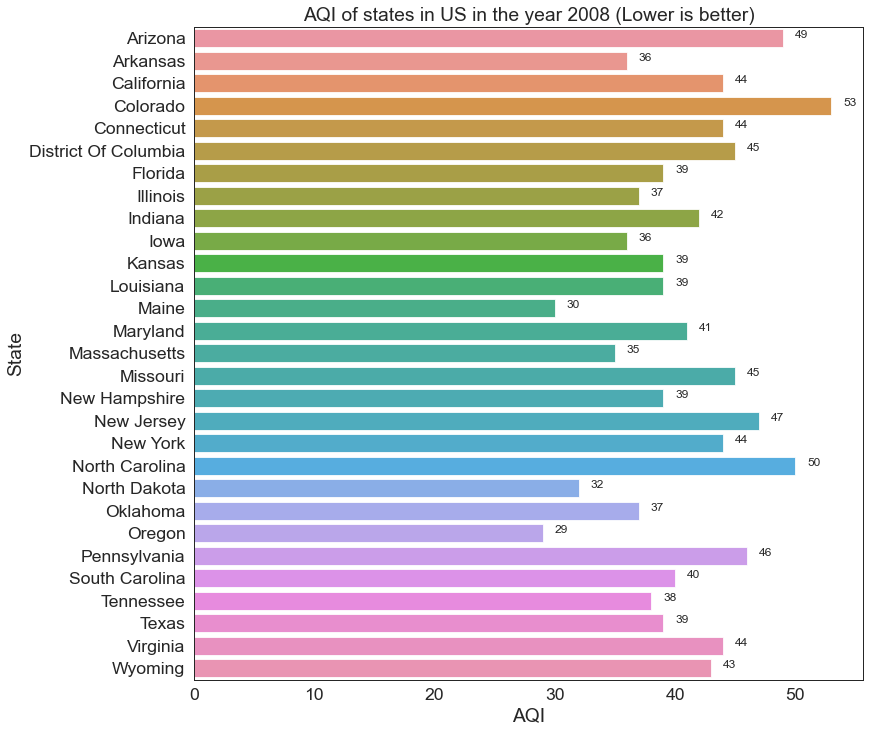

In [94]:
year_2008 = state_data.loc[state_data['Year'] == 2008]
year_2008_mean = year_2008.groupby(['State'],as_index=False).mean()
year_2008_mean['AQI'] = year_2008_mean['AQI'].astype(int)
year_2008_mean = year_2008_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2008_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2008 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2008_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2008.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2009

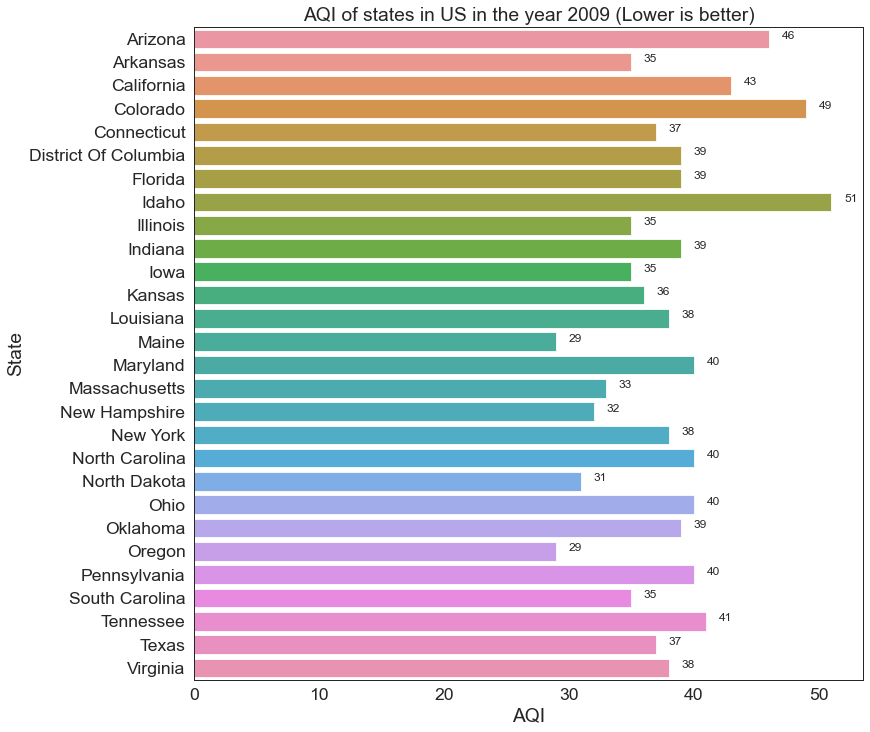

In [95]:
year_2009 = state_data.loc[state_data['Year'] == 2009]
year_2009_mean = year_2009.groupby(['State'],as_index=False).mean()
year_2009_mean['AQI'] = year_2009_mean['AQI'].astype(int)
year_2009_mean = year_2009_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2009_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2009 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2009_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2009.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2010

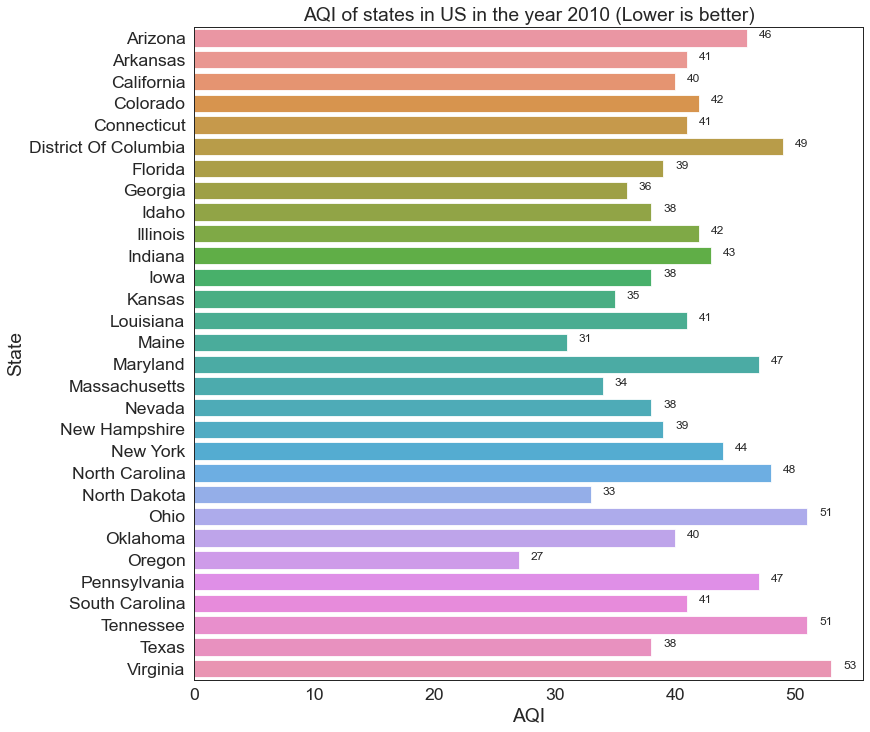

In [96]:
year_2010 = state_data.loc[state_data['Year'] == 2010]
year_2010_mean = year_2010.groupby(['State'],as_index=False).mean()
year_2010_mean['AQI'] = year_2010_mean['AQI'].astype(int)
year_2010_mean = year_2010_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2010_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2010 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2010_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2010.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2011

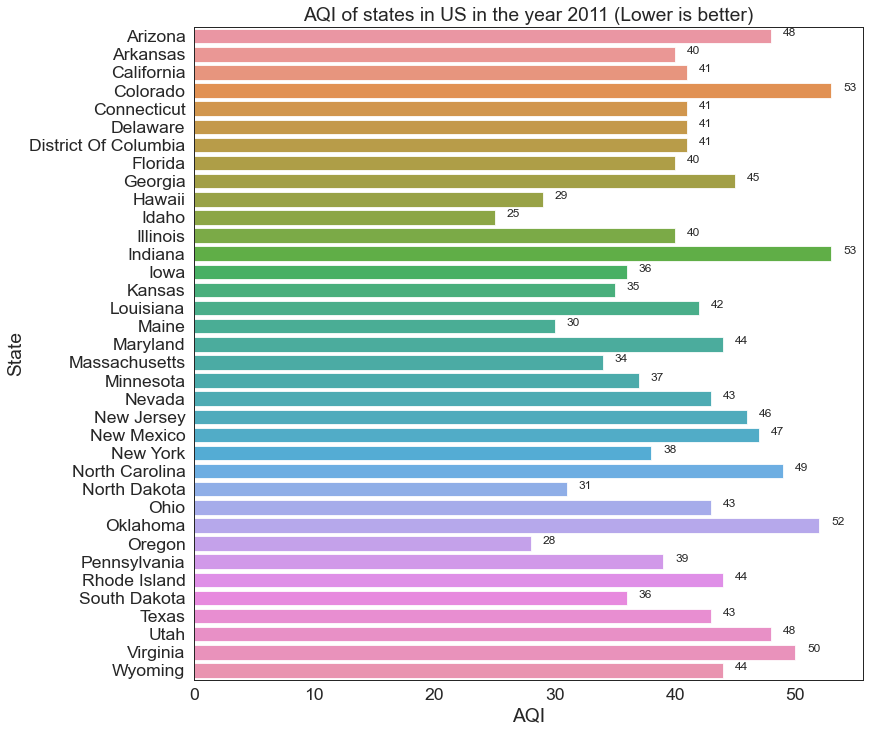

In [97]:
year_2011 = state_data.loc[state_data['Year'] == 2011]
year_2011_mean = year_2011.groupby(['State'],as_index=False).mean()
year_2011_mean['AQI'] = year_2011_mean['AQI'].astype(int)
year_2011_mean = year_2011_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2011_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2011 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2011_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2011.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2012

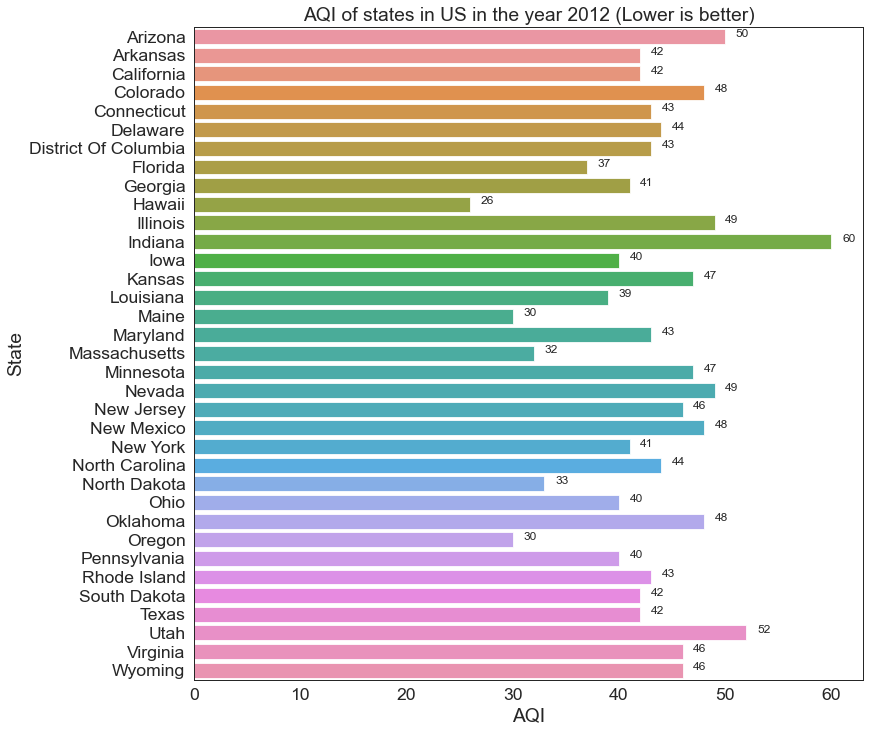

In [98]:
year_2012 = state_data.loc[state_data['Year'] == 2012]
year_2012_mean = year_2012.groupby(['State'],as_index=False).mean()
year_2012_mean['AQI'] = year_2012_mean['AQI'].astype(int)
year_2012_mean = year_2012_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2012_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2012 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2012_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2012.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2013

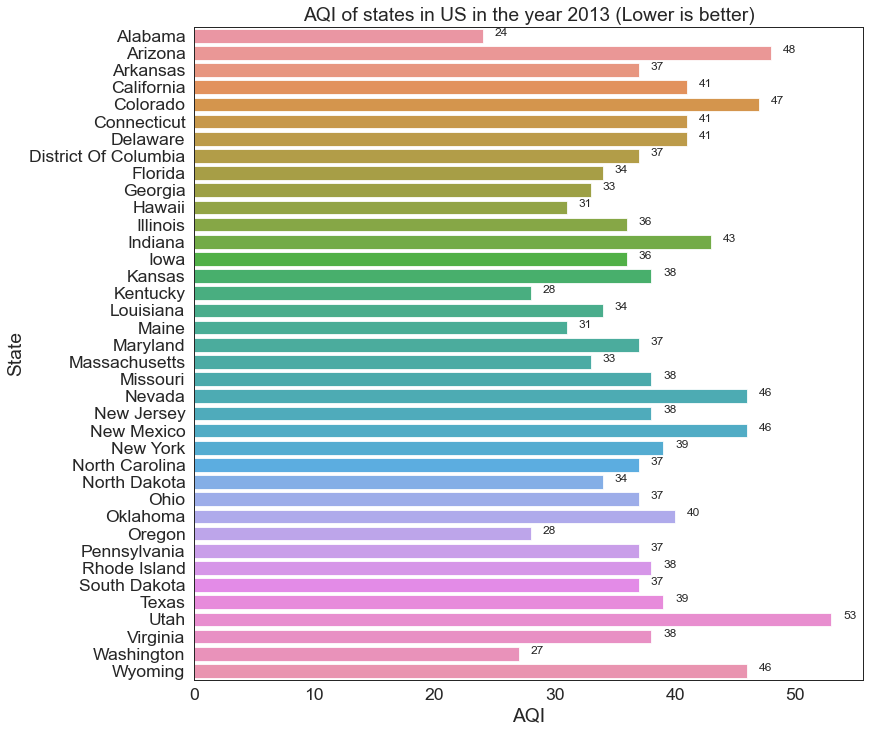

In [99]:
year_2013 = state_data.loc[state_data['Year'] == 2013]
year_2013_mean = year_2013.groupby(['State'],as_index=False).mean()
year_2013_mean['AQI'] = year_2013_mean['AQI'].astype(int)
year_2013_mean = year_2013_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2013_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2013 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2013_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2013.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2014

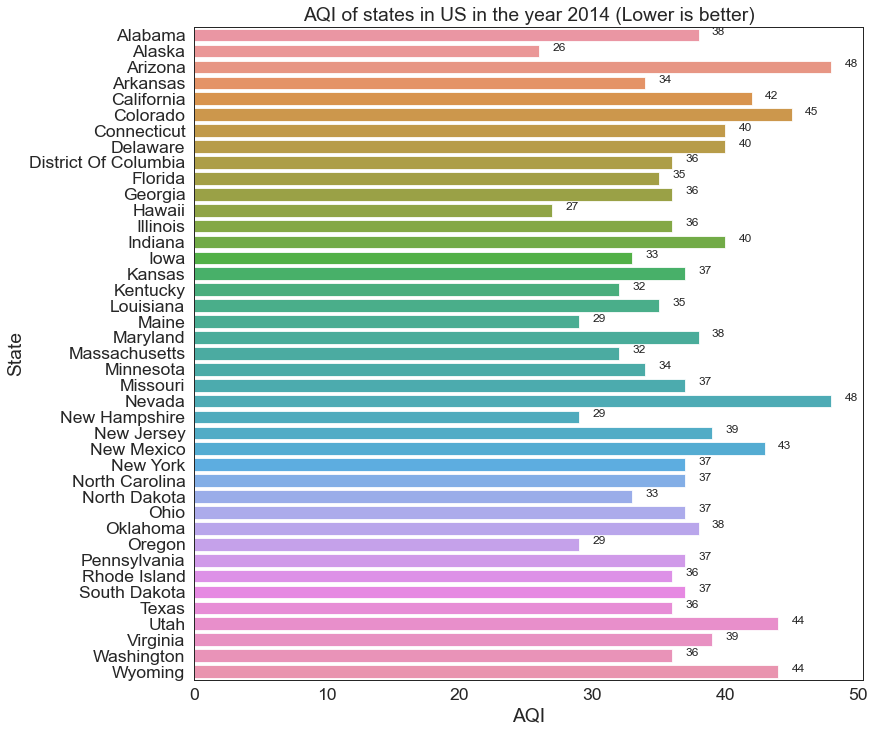

In [100]:
year_2014 = state_data.loc[state_data['Year'] == 2014]
year_2014_mean = year_2014.groupby(['State'],as_index=False).mean()
year_2014_mean['AQI'] = year_2014_mean['AQI'].astype(int)
year_2014_mean = year_2014_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2014_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2014 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2014_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2014.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2015

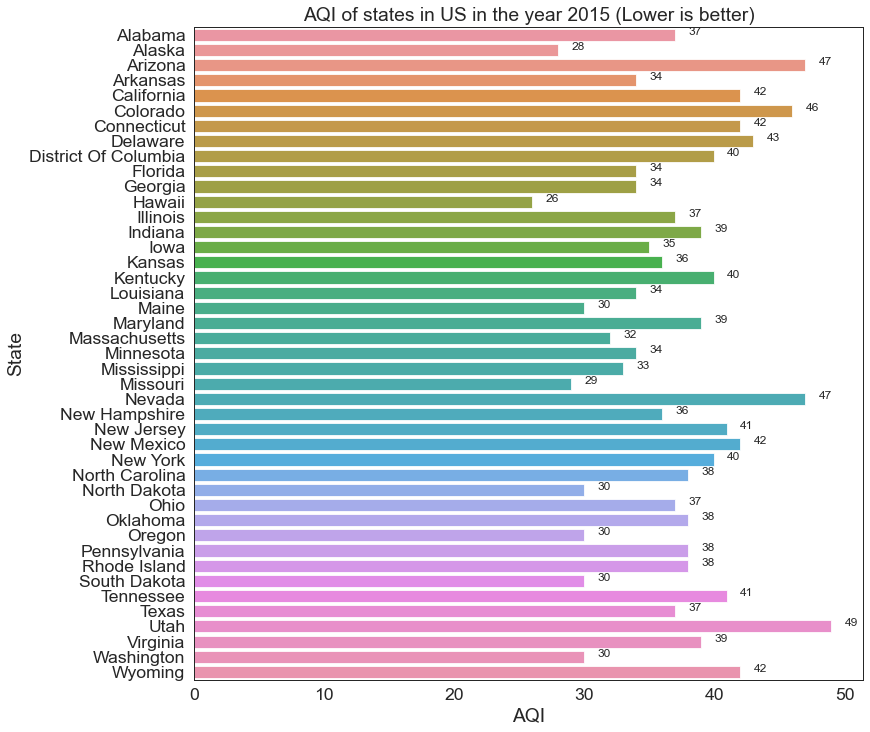

In [101]:
year_2015 = state_data.loc[state_data['Year'] == 2015]
year_2015_mean = year_2015.groupby(['State'],as_index=False).mean()
year_2015_mean['AQI'] = year_2015_mean['AQI'].astype(int)
year_2015_mean = year_2015_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2015_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2015 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2015_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2015.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2016

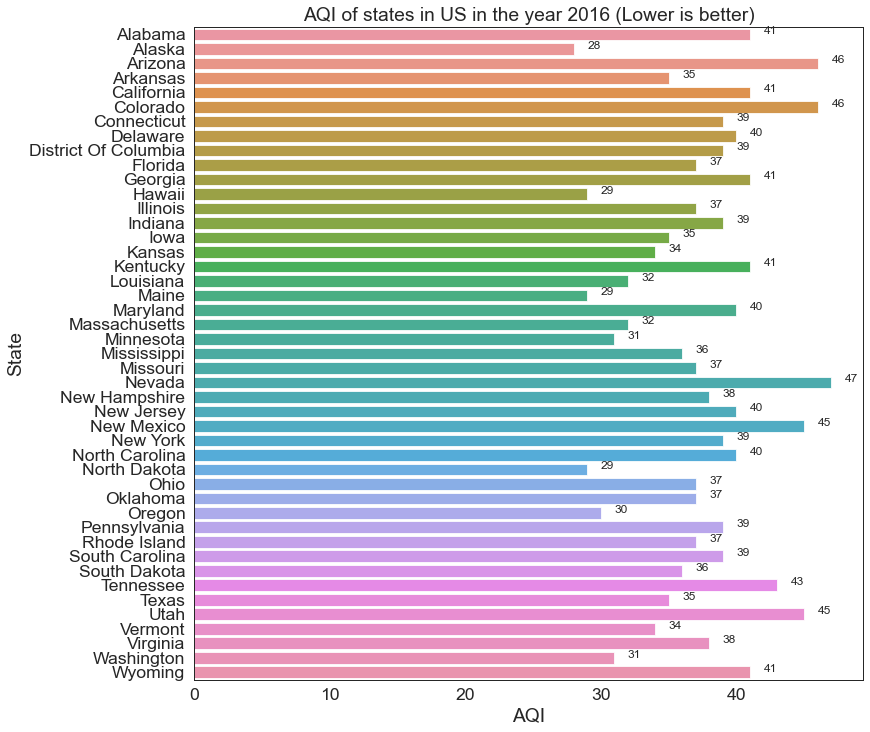

In [102]:
year_2016 = state_data.loc[state_data['Year'] == 2016]
year_2016_mean = year_2016.groupby(['State'],as_index=False).mean()
year_2016_mean['AQI'] = year_2016_mean['AQI'].astype(int)
year_2016_mean = year_2016_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2016_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2016 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2016_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2016.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2017

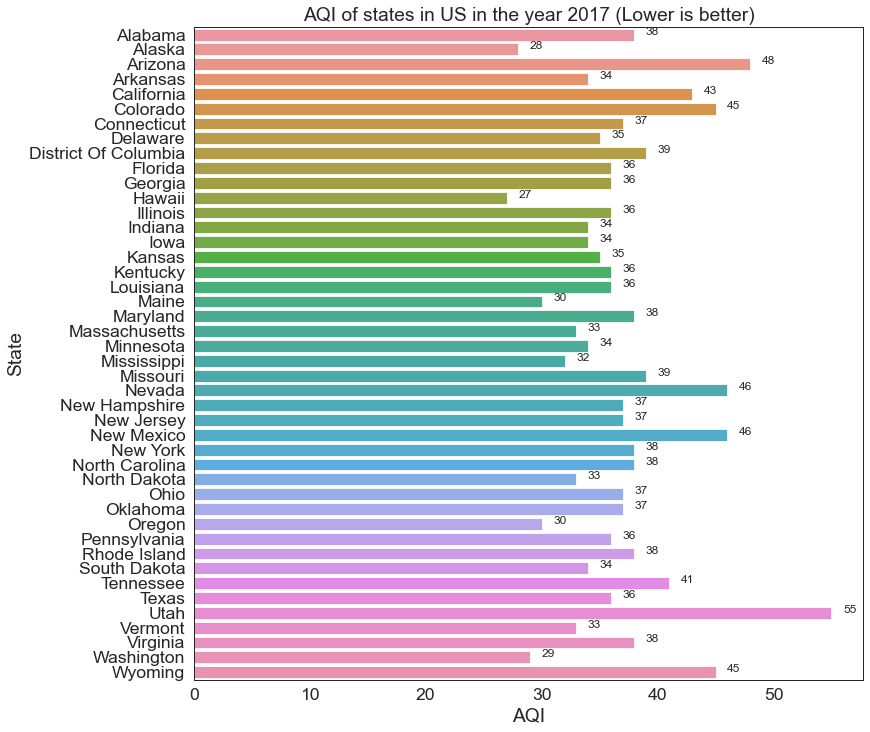

In [103]:
year_2017 = state_data.loc[state_data['Year'] == 2017]
year_2017_mean = year_2017.groupby(['State'],as_index=False).mean()
year_2017_mean['AQI'] = year_2017_mean['AQI'].astype(int)
year_2017_mean = year_2017_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2017_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2017 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2017_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2017.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2018

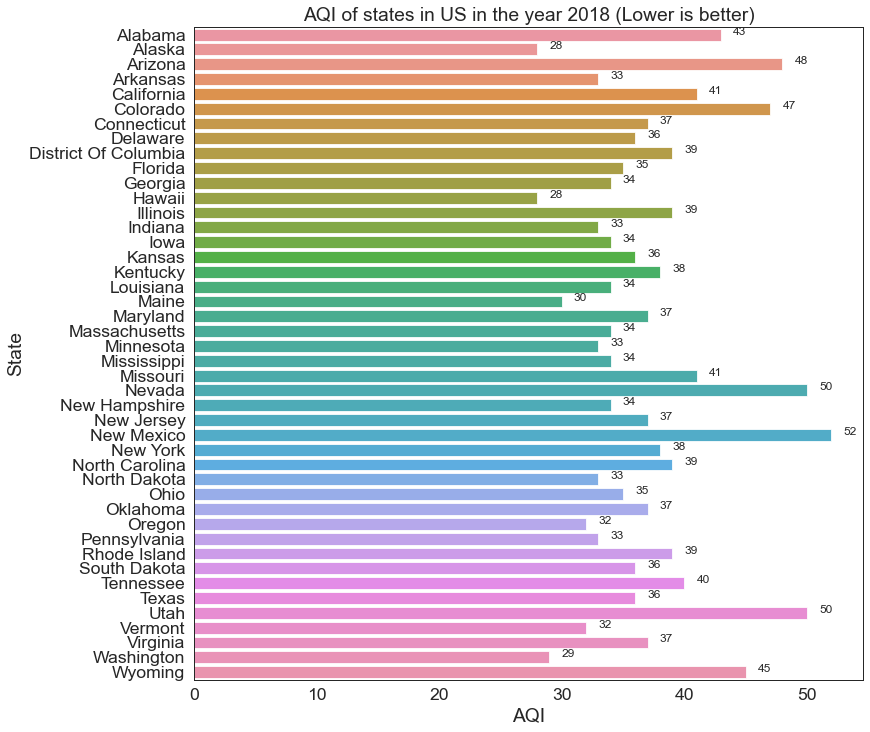

In [104]:
year_2018 = state_data.loc[state_data['Year'] == 2018]
year_2018_mean = year_2018.groupby(['State'],as_index=False).mean()
year_2018_mean['AQI'] = year_2018_mean['AQI'].astype(int)
year_2018_mean = year_2018_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2018_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2018 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2018_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2018.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2019

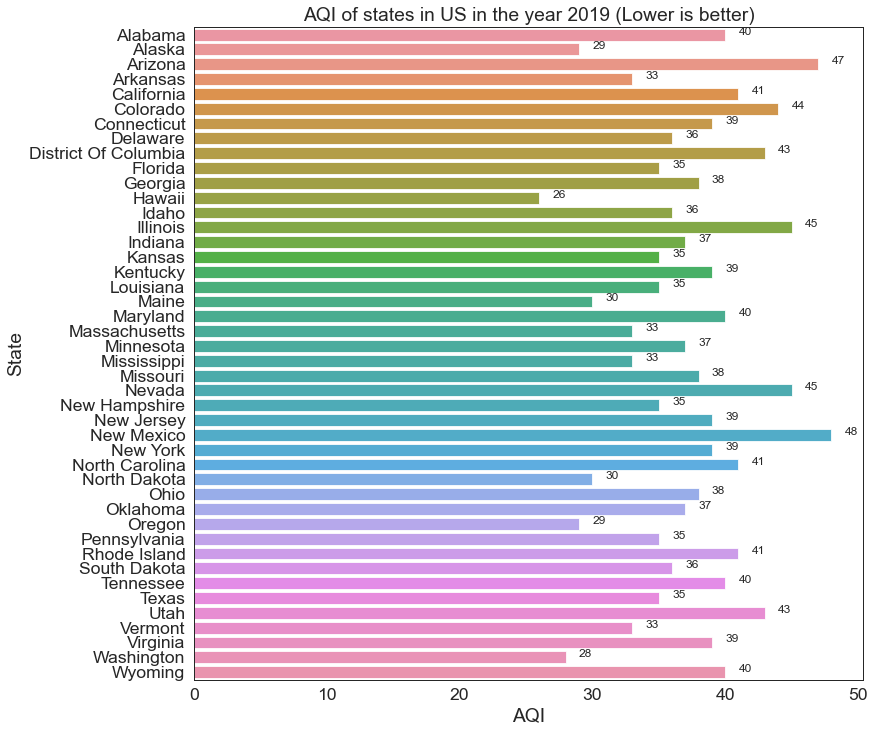

In [105]:
year_2019 = state_data.loc[state_data['Year'] == 2019]
year_2019_mean = year_2019.groupby(['State'],as_index=False).mean()
year_2019_mean['AQI'] = year_2019_mean['AQI'].astype(int)
year_2019_mean = year_2019_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2019_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2019 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2019_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2019.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2020

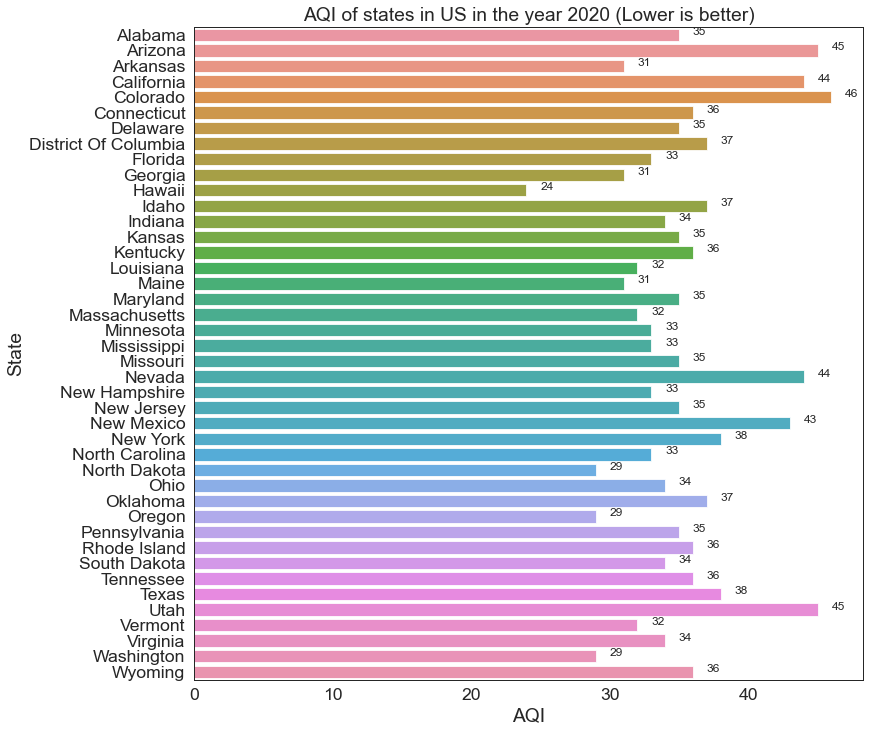

In [106]:
year_2020 = state_data.loc[state_data['Year'] == 2020]
year_2020_mean = year_2020.groupby(['State'],as_index=False).mean()
year_2020_mean['AQI'] = year_2020_mean['AQI'].astype(int)
year_2020_mean = year_2020_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2020_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2020 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2020_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2020.png',bbox_inches = 'tight', dpi = 200)

## YEAR 2021

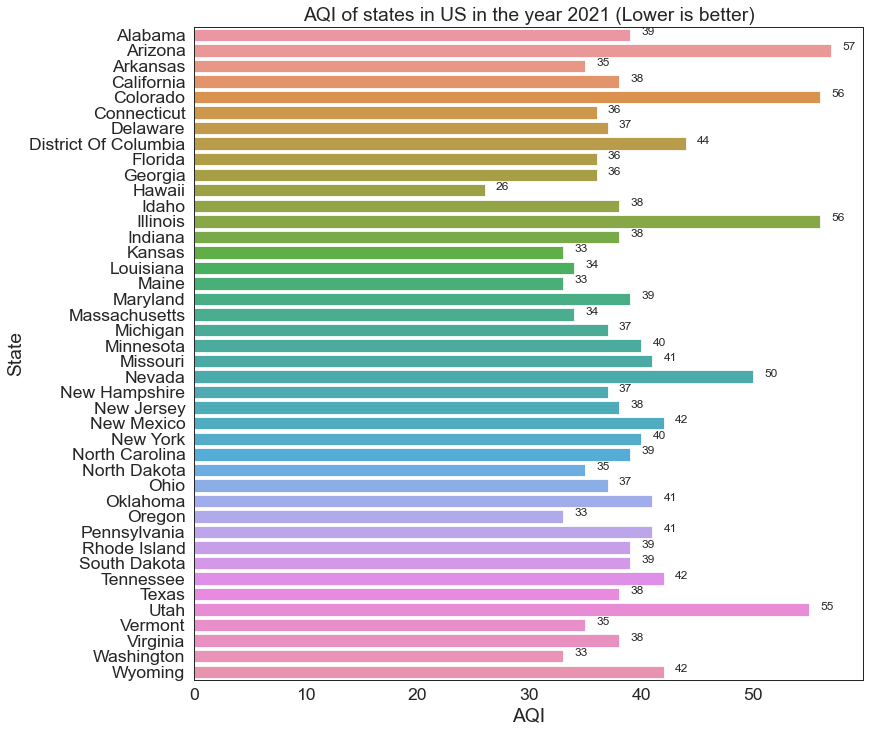

In [107]:
year_2021 = state_data.loc[state_data['Year'] == 2021]
year_2021_mean = year_2021.groupby(['State'],as_index=False).mean()
year_2021_mean['AQI'] = year_2021_mean['AQI'].astype(int)
year_2021_mean = year_2021_mean.drop(['Year'],axis=1)


fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x= 'AQI', y= 'State', data=year_2021_mean, ax=ax)
ax.set_title('AQI of states in US in the year 2021 (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_2021_mean['AQI'].tolist()):
    ax.text(y=i, x=v+1, s=f"{v}" , fontdict=dict(fontsize=12))
plt.show()
fig.savefig('2021.png',bbox_inches = 'tight', dpi = 200)

## YEAR WISE DATA FROM 2000 - 2021

Here we are finding the total combined AQI values of all states in US from 2000 to 2021

In [108]:
year_data = state_data.drop(['State'],axis=1)

In [109]:
year_data

Year   AQI
0       2000  46.0
1       2000  34.0
2       2000  48.0
3       2000  72.0
4       2000  58.0
...      ...   ...
592509  2021  45.0
592510  2021  39.0
592511  2021  46.0
592512  2021  61.0
592513  2021  50.0

[592514 rows x 2 columns]

In [110]:
year_data_mean = year_data.groupby(['Year'], as_index=False).mean()

year_data_mean

Year        AQI
0   2000  48.970595
1   2001  50.398186
2   2002  51.114160
3   2003  47.774142
4   2004  44.686330
5   2005  47.300153
6   2006  45.792921
7   2007  45.318470
8   2008  43.255320
9   2009  40.092050
10  2010  41.704723
11  2011  41.610673
12  2012  42.429561
13  2013  39.811405
14  2014  39.171666
15  2015  39.180353
16  2016  39.047755
17  2017  39.298026
18  2018  39.337646
19  2019  39.333864
20  2020  38.562574
21  2021  41.522655

In [111]:
year_data_mean['AQI'] = year_data_mean['AQI'].astype(int)

year_data_mean

Year  AQI
0   2000   48
1   2001   50
2   2002   51
3   2003   47
4   2004   44
5   2005   47
6   2006   45
7   2007   45
8   2008   43
9   2009   40
10  2010   41
11  2011   41
12  2012   42
13  2013   39
14  2014   39
15  2015   39
16  2016   39
17  2017   39
18  2018   39
19  2019   39
20  2020   38
21  2021   41

In [112]:
year_data_mean['Year'] = year_data_mean['Year'].astype(str)

year_data_mean

Year  AQI
0   2000   48
1   2001   50
2   2002   51
3   2003   47
4   2004   44
5   2005   47
6   2006   45
7   2007   45
8   2008   43
9   2009   40
10  2010   41
11  2011   41
12  2012   42
13  2013   39
14  2014   39
15  2015   39
16  2016   39
17  2017   39
18  2018   39
19  2019   39
20  2020   38
21  2021   41

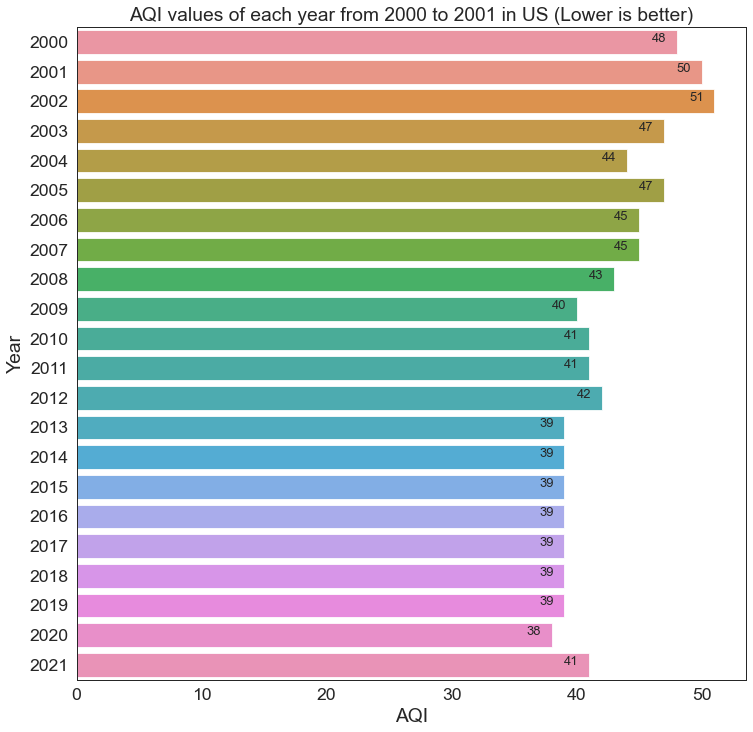

In [123]:
fig, ax= plt.subplots(figsize=(12,12))
sns.barplot(x = 'AQI', y = 'Year', data=year_data_mean, ax=ax)
ax.set_title('AQI values of each year from 2000 to 2001 in US (Lower is better)')
year_graph = sns.set(style='white')
year_graph = sns.set_context('paper', font_scale=2)  
for i,v in enumerate(year_data_mean['AQI'].tolist()):
    ax.text(y=i, x=v-2, s=f"{v}" , fontdict=dict(fontsize=13))
plt.show()
fig.savefig('Year Wise.png',bbox_inches = 'tight', dpi = 200)

## Top 10 best and worst days of air quality in US

The top 10 best and worst reported days on air quality in United States(time period: year 2000 - 2021)

In [114]:
data2 = data1.drop(['City'],axis=1)

data2['AQI'] = data2['AQI'].astype(int)

data2

Year  Month  Day    State  AQI
0       2000      1    1  Arizona   46
1       2000      1    2  Arizona   34
2       2000      1    3  Arizona   48
3       2000      1    4  Arizona   72
4       2000      1    5  Arizona   58
...      ...    ...  ...      ...  ...
592509  2021      6   26  Wyoming   45
592510  2021      6   27  Wyoming   39
592511  2021      6   28  Wyoming   46
592512  2021      6   29  Wyoming   61
592513  2021      6   30  Wyoming   50

[592514 rows x 5 columns]

In [115]:
sorted_AQI = data2.sort_values(by = 'AQI').reset_index()

In [116]:
sorted_AQI

index  Year  Month  Day         State  AQI
0       481156  2017      8    6  Pennsylvania    1
1       481155  2017      8    5  Pennsylvania    1
2       324426  2012      3   18      Oklahoma    2
3       324425  2012      3   17      Oklahoma    2
4       166395  2007      7   21    California    3
...        ...   ...    ...  ...           ...  ...
592509   91365  2003      5   31         Texas  226
592510   18264  2000      6   10  Pennsylvania  227
592511  194532  2008      6   27    California  228
592512   19248  2000      6   10  Pennsylvania  228
592513   76238  2003      8   17    California  237

[592514 rows x 6 columns]

In [117]:
sorted_AQI = sorted_AQI.drop(['index'],axis=1)

In [118]:
sorted_AQI

Year  Month  Day         State  AQI
0       2017      8    6  Pennsylvania    1
1       2017      8    5  Pennsylvania    1
2       2012      3   18      Oklahoma    2
3       2012      3   17      Oklahoma    2
4       2007      7   21    California    3
...      ...    ...  ...           ...  ...
592509  2003      5   31         Texas  226
592510  2000      6   10  Pennsylvania  227
592511  2008      6   27    California  228
592512  2000      6   10  Pennsylvania  228
592513  2003      8   17    California  237

[592514 rows x 5 columns]

## Top 10 best days to live in US with fresh air

In [119]:
top_10_best = sorted_AQI.head(10)

top_10_best

Year  Month  Day         State  AQI
0  2017      8    6  Pennsylvania    1
1  2017      8    5  Pennsylvania    1
2  2012      3   18      Oklahoma    2
3  2012      3   17      Oklahoma    2
4  2007      7   21    California    3
5  2021      1   18    California    3
6  2019      8   25  Pennsylvania    3
7  2019      9   30    California    3
8  2017      9   25     Minnesota    4
9  2018     11   30  South Dakota    4

## Top 10 worst days to live in US without fresh air

In [120]:
top_10_worst = sorted_AQI.tail(10)

top_10_worst

Year  Month  Day                 State  AQI
592504  2002      7    2  District Of Columbia  224
592505  2006      7   22            California  224
592506  2002      7   18              New York  224
592507  2005      5   22            California  225
592508  2008      7    9            California  226
592509  2003      5   31                 Texas  226
592510  2000      6   10          Pennsylvania  227
592511  2008      6   27            California  228
592512  2000      6   10          Pennsylvania  228
592513  2003      8   17            California  237

## Sources/References:

- CSV file source: https://www.kaggle.com/alpacanonymous/us-pollution-20002021
- Reference: https://en.wikipedia.org/wiki/Air_quality_index

## Thank You :)